In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv('eda_data.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,R,spark_yn,AWS,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,50,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,39,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,13,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,58,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,25,1,0,0,0,1,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,193,0,0,0,1,0,na,senior,6219,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,17,1,0,1,1,0,data engineer,senior,6167,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,39,0,0,0,0,1,na,na,3107,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,-1,0,0,0,0,1,manager,na,1678,0


In [3]:
# choose relevant columns 
df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python','spark_yn','AWS','excel_yn','job_simp','seniority','desc_len']]

In [4]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [5]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import statsmodels.api as sm
# Convert boolean columns to binary integers (0 and 1)
bool_columns = ['job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
                'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
                'seniority_jr', 'seniority_na', 'seniority_senior']

X_train[bool_columns] = X_train[bool_columns].astype(int)

# Now fit the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           3.07e-95
Time:                        23:33:15   Log-Likelihood:                -3312.7
No. Observations:                 742   AIC:                             6907.
Df Residuals:                     601   BIC:                             7557.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.67054618746022

,alpha,error
11,0.12,-19.260783


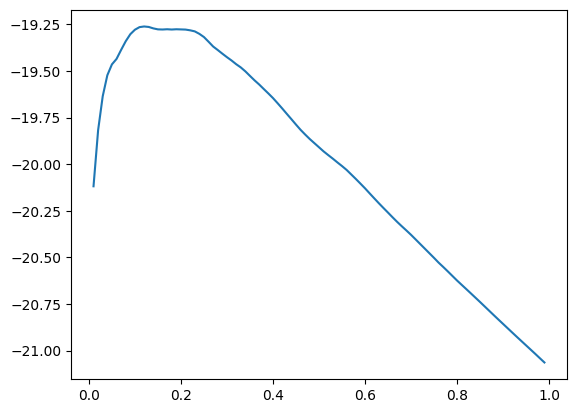

In [8]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [9]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.138853680630332

In [10]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 1044.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Goerge\anaconda3\envs\Final_Project\lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

RandomForestRegressor(criterion='poisson', max_features='sqrt',
                      n_estimators=290)

In [11]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)


12.026614209673689

# Predict salary cahnge in next 15 years (5 year interval)

In [12]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "gs.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gs, file)

In [13]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)
y_predict

# check results
#print(classification_report(y_test, y_predict))

array([111.87413793,  52.44137931, 151.70344828, 124.69310345,
       153.43793103, 115.59655172, 145.30172414,  62.45517241,
        75.61034483,  86.62241379, 146.76206897,  69.98793103,
       108.06034483, 116.57586207,  80.62413793, 139.00344828,
        76.03793103,  71.68275862,  99.30172414,  98.86034483,
       111.8       , 145.30172414, 146.74482759, 113.78275862,
       126.38448276, 106.54310345,  73.18965517, 139.94137931,
       105.45      ,  98.61206897,  83.89137931,  54.11896552,
       122.84310345, 105.40344828, 103.4137931 ,  87.08275862,
        87.51206897, 113.59137931,  65.99655172, 116.50172414,
       203.60172414, 120.9       ,  88.54482759,  78.47413793,
       144.27931034,  79.68448276, 136.62758621, 113.77758621,
       128.48448276, 105.53965517,  95.25172414,  83.32758621,
        77.37586207, 104.74827586,  93.10862069, 113.81034483,
        88.54482759,  72.56034483, 242.34310345, 119.86724138,
       118.65      , 100.15862069, 107.8       , 134.83

In [14]:
X_test_example1 = X_test.head()
X_test_example1

,Rating,num_comp,hourly,employer_provided,same_state,age,python,spark_yn,AWS,excel_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
120,4.4,0,0,0,1,24,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
196,3.6,0,0,0,1,37,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
336,3.5,3,0,0,1,13,1,0,0,1,...,False,False,False,False,False,False,True,False,False,True
582,3.9,0,0,0,1,11,1,0,1,0,...,False,False,True,False,False,False,False,False,False,True
395,4.0,2,0,0,0,16,1,1,1,1,...,False,True,False,False,False,False,False,False,False,True


In [16]:
X_test_example1['age'] = X_test_example1['age'] + 5
X_test_example1

C:\Users\Goerge\AppData\Local\Temp\ipykernel_22076\1200115386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_example1['age'] = X_test_example1['age'] + 5


,Rating,num_comp,hourly,employer_provided,same_state,age,python,spark_yn,AWS,excel_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
120,4.4,0,0,0,1,29,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
196,3.6,0,0,0,1,42,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
336,3.5,3,0,0,1,18,1,0,0,1,...,False,False,False,False,False,False,True,False,False,True
582,3.9,0,0,0,1,16,1,0,1,0,...,False,False,True,False,False,False,False,False,False,True
395,4.0,2,0,0,0,21,1,1,1,1,...,False,True,False,False,False,False,False,False,False,True


In [17]:
model.predict(X_test_example1)

array([112.42068966,  52.06551724, 146.86896552, 123.97586207,
       147.67758621])

In [18]:
y_test[:5]

array([100.5,  48.5, 154.5, 122. , 162. ])

In [20]:
X_test_example1.to_csv('X_test_example1.csv', index = False)

In [21]:
X_test_gf = pd.read_csv('X_test_example.csv')

In [23]:
model.predict(X_test.head())
result = model.predict(X_test_example1)
result
result_df = pd.DataFrame(result)
result_df

result_df.to_csv('predict1.csv', index = False)